In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/bobo/data_analysis/project3/transactions_csv.csv')
df.head()

,transaction id,date,time,transaction type,merchant_category,amount (INR),transaction_status,sender_cat,reciver_cat,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,day_of_week,is_weekend
0,TXN0000000001,2024-08-10,15:17:28,P2P,Entertainment,868,SUCCESS,adult,teenager,Delhi,Axis,SBI,Android,4G,0,Tuesday,0
1,TXN0000000002,2024-11-04,6:56:00,P2M,Grocery,1011,SUCCESS,adult,adult,Uttar Pradesh,ICICI,Axis,iOS,4G,0,Thursday,0
2,TXN0000000003,2024-02-04,13:27:18,P2P,Grocery,477,SUCCESS,adult,gentleman,Karnataka,Yes Bank,PNB,Android,4G,0,Tuesday,0
3,TXN0000000004,2024-07-01,10:09:17,P2P,Fuel,2784,SUCCESS,adult,adult,Delhi,ICICI,PNB,Android,5G,0,Sunday,1
4,TXN0000000005,2024-01-23,19:04:23,P2P,Shopping,990,SUCCESS,adult,teenager,Delhi,Axis,Yes Bank,iOS,WiFi,0,Tuesday,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249999 entries, 0 to 249998
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      249999 non-null  object
 1   date                249999 non-null  object
 2   time                249999 non-null  object
 3   transaction type    249999 non-null  object
 4   merchant_category   249999 non-null  object
 5   amount              249999 non-null  int64 
 6   transaction_status  249999 non-null  object
 7   sender_cat          249999 non-null  object
 8   reciver_cat         249999 non-null  object
 9   sender_state        249999 non-null  object
 10  sender_bank         249999 non-null  object
 11  receiver_bank       249999 non-null  object
 12  device_type         249999 non-null  object
 13  network_type        249999 non-null  object
 14  fraud_flag          249999 non-null  int64 
 15  day_of_week         249999 non-null  object
 16  is

In [8]:
print('number of duplicated rows is {}'.format(df.duplicated().sum()))
print('number of empty cells in each row is : \n{}'.format(df.isnull().sum()))

number of duplicated rows is 0
number of empty cells in each row is : 
transaction id        0
date                  0
time                  0
transaction type      0
merchant_category     0
amount (INR)          0
transaction_status    0
sender_cat            0
reciver_cat           0
sender_state          0
sender_bank           0
receiver_bank         0
device_type           0
network_type          0
fraud_flag            0
day_of_week           0
is_weekend            0
dtype: int64


In [12]:
df.rename(columns={'amount (INR)':'amount'}, inplace=True)

In [21]:
no_non_realistic_amount = df[df['amount'] <= 0]['amount'].sum()
no_non_realistic_flag = df[~(df[['fraud_flag','is_weekend']].isin([0,1]))][['fraud_flag','is_weekend']].sum().astype(int)
print(no_non_realistic_amount)
print(no_non_realistic_flag)

0
fraud_flag    0
is_weekend    0
dtype: int32


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in categorical_columns:
    df[col] = df[col].astype('string').str.strip().str.title()

In [34]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['time'] = pd.to_datetime(df['time'], format='mixed').dt.time

In [37]:
for col in categorical_columns:
    unique_count = df[col].nunique()
    most_common = df[col].mode()[0]
    print(f"   • {col}: {unique_count} unique values (Most common: {most_common})")
    print('')

   • transaction id: 249999 unique values (Most common: Txn0000000001)

   • time: 69220 unique values (Most common: 19:49:23)

   • transaction type: 4 unique values (Most common: P2P)

   • merchant_category: 10 unique values (Most common: Grocery)

   • transaction_status: 2 unique values (Most common: Success)

   • sender_cat: 5 unique values (Most common: Adult)

   • reciver_cat: 5 unique values (Most common: Adult)

   • sender_state: 10 unique values (Most common: Maharashtra)

   • sender_bank: 8 unique values (Most common: Sbi)

   • receiver_bank: 8 unique values (Most common: Sbi)

   • device_type: 3 unique values (Most common: Android)

   • network_type: 4 unique values (Most common: 4G)

   • day_of_week: 7 unique values (Most common: Monday)



In [50]:
df['amount category'] = pd.cut(df['amount'], bins=[0,10000,30000,float('inf')], labels=['low','medium','high'])
df[df['amount category'].isin(['medium','high'])][['amount','amount category']].count()

amount             1805
amount category    1805
dtype: int64

In [51]:
# outliers detection 
z_score = np.abs(scipy.stats.zscore(df[numerical_columns]))
z_outliers = (z_score > 3).any(axis=1)

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
IQR_outliers =  ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

all_otliers = z_outliers | IQR_outliers



In [60]:
df.head(2)

,transaction id,date,time,transaction type,merchant_category,amount,transaction_status,sender_cat,reciver_cat,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,day_of_week,is_weekend,amount category
0,Txn0000000001,2024-08-10,15:17:28,P2P,Entertainment,868,Success,Adult,Teenager,Delhi,Axis,Sbi,Android,4G,0,Tuesday,0,low
1,Txn0000000002,2024-11-04,06:56:00,P2M,Grocery,1011,Success,Adult,Adult,Uttar Pradesh,Icici,Axis,Ios,4G,0,Thursday,0,low


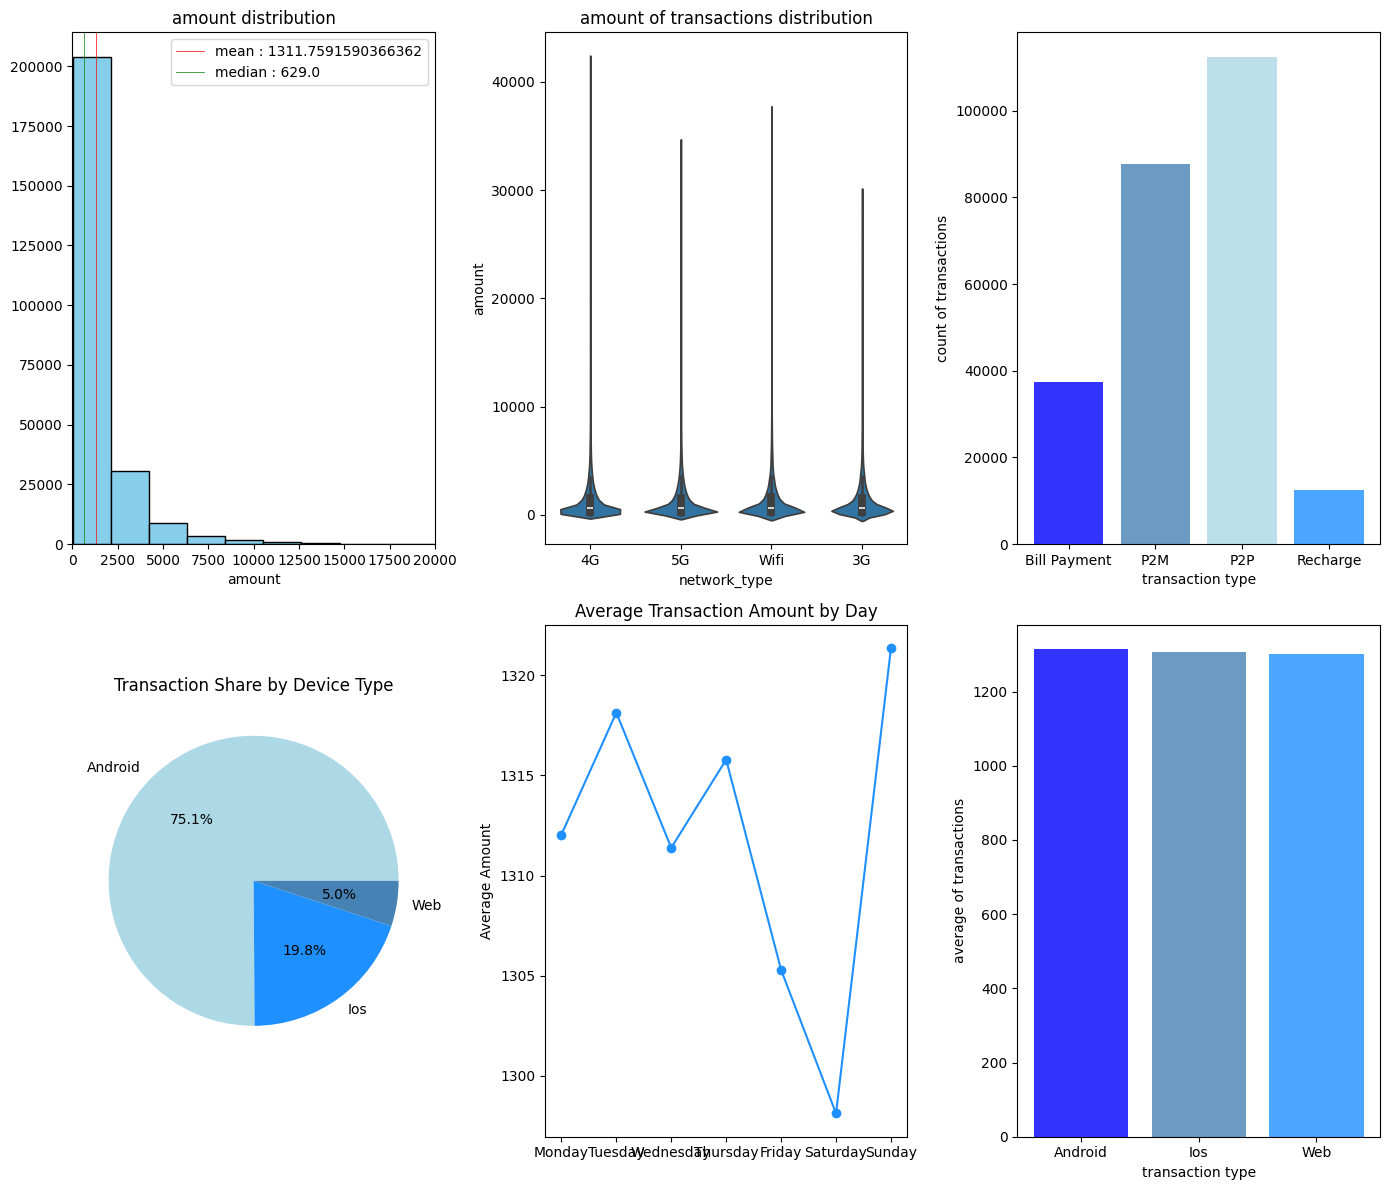

In [79]:
# dashboard 
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14,12))

ax[0,0].hist(df['amount'], bins=20, color='skyblue', edgecolor='black')
ax[0,0].axvline(df['amount'].mean(), color='red', label=f'mean : {df['amount'].mean()}', lw=0.5)
ax[0,0].axvline(df['amount'].median(), color='green', label=f'median : {df['amount'].median()}', lw=0.5)
ax[0,0].set_xlim(0, 20000)
ax[0,0].set_title('amount distribution')
ax[0,0].set_xlabel('amount')
ax[0,0].legend()

sns.violinplot(data=df, x='network_type', y='amount', ax=ax[0,1])
ax[0,1].set_title('amount of transactions distribution')

transaction_type_statistics = df.groupby('transaction type')['amount'].agg(['mean','median','count'])
ax[0,2].bar(transaction_type_statistics.index, transaction_type_statistics['count'], alpha=0.8, color=['blue','steelblue','lightblue','dodgerblue'])
ax[0,2].set_xlabel('transaction type')
ax[0,2].set_ylabel('count of transactions')

device_type_statistics = df.groupby('device_type')['amount'].agg(['mean','median','count'])
ax[1,2].bar(device_type_statistics.index, device_type_statistics['mean'], alpha=0.8, color=['blue','steelblue','dodgerblue'])
ax[1,2].set_xlabel('transaction type')
ax[1,2].set_ylabel('average of transactions')

ax[1,0].pie(device_type_statistics['count'],labels=device_type_statistics.index, autopct='%1.1f%%', colors=['lightblue', 'dodgerblue', 'steelblue'])
ax[1,0].set_title('Transaction Share by Device Type')

day_avg = df.groupby('day_of_week')['amount'].mean()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_avg = day_avg.reindex(ordered_days)
ax[1,1].plot(day_avg.index, day_avg.values, marker='o', linestyle='-', color='dodgerblue')
ax[1,1].set_title('Average Transaction Amount by Day')
ax[1,1].set_ylabel('Average Amount')


plt.tight_layout()


Text(0.5, 1.0, 'Advanced Correlation Matrix - Used Car Features')

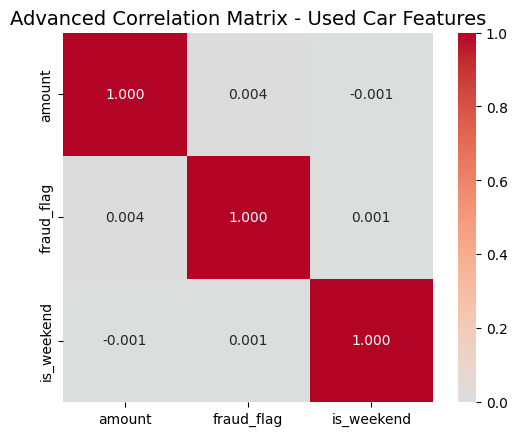

In [ ]:
correlation_matrix = df[numerical_columns].corr()
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.3:  # Threshold for meaningful correlation
            strong_correlations.append({
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': corr
            })
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')


In [ ]:
# hypothesis test
# do fraud rates increase on weekend ? 

weekend_data = df[df['is_weekend'] == 1]['fraud_flag']
weekday_data = df[df['is_weekend'] == 0]['fraud_flag']
t_stat, p_value = scipy.stats.ttest_ind(weekend_data, weekday_data, equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# p value is higher than alpha (0.05) so the null hypothesis is rejected

T-statistic: 0.6024
P-value: 0.5469


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

df_model = df.drop(columns=['transaction id', 'date', 'time'])



In [ ]:
X = df_model.drop(columns=['fraud_flag'])
y = df_model['fraud_flag']
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



In [ ]:
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation reports
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
logreg_auc = roc_auc_score(y_test, y_prob_logreg)
rf_auc = roc_auc_score(y_test, y_prob_rf)

logreg_report, logreg_auc, rf_report, rf_auc


the acrruracy of ROC and AUC is very bad because there is only 480 fraud transactions 